In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set image size and batch size
image_size = (48, 48)  # Images are 48x48 in grayscale
batch_size = 32

# Data augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,            # Normalize pixel values
    rotation_range=20,         # Randomly rotate images
    width_shift_range=0.2,     # Randomly shift images horizontally
    height_shift_range=0.2,    # Randomly shift images vertically
    shear_range=0.2,           # Random shear transformation
    zoom_range=0.2,            # Randomly zoom in on images
    horizontal_flip=True,      # Randomly flip images horizontally
    fill_mode='nearest'        # Fill in missing pixels after transforms
)

# Only rescale the test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training and validation datasets
train_generator = train_datagen.flow_from_directory(
    '/Users/abhishekwaghchaure/Desktop/PWSkillsDataScience/DataSets/Fer2013/train',  # Replace with your train directory path
    target_size=image_size,
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    '/Users/abhishekwaghchaure/Desktop/PWSkillsDataScience/DataSets/Fer2013/test',  # Replace with your test directory path
    target_size=image_size,
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical'
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [2]:
from tensorflow.keras import layers, models

# Building a simple CNN architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(7, activation='softmax')  # 7 classes for emotion classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display model architecture
model.summary()

/opt/anaconda3/envs/tensor/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-10-12 20:34:30.916727: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-10-12 20:34:30.916760: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-10-12 20:34:30.916771: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-10-12 20:34:30.916984: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-10-12 20:34:30.916995: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.c

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 355,847 (1.36 MB)

 Trainable params: 355,847 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [3]:
# Train the CNN model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=25,  # You can change the number of epochs
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

Epoch 1/25


2024-10-12 20:34:43.933762: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
/opt/anaconda3/envs/tensor/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


897/897 ━━━━━━━━━━━━━━━━━━━━ 28s 26ms/step - accuracy: 0.2429 - loss: 1.8297 - val_accuracy: 0.2522 - val_loss: 1.7847
Epoch 2/25
  1/897 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - accuracy: 0.2500 - loss: 1.8152

2024-10-12 20:35:11.559587: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-12 20:35:11.559618: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17627627699310034920
2024-10-12 20:35:11.559626: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4698212440108392858
2024-10-12 20:35:11.559631: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_14/_52]]
2024-10-12 20:35:11.559636: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17600185562413023615
2024-10-12 20:35:11.559639: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12624474

897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step - accuracy: 0.2500 - loss: 1.8152 - val_accuracy: 0.0000e+00 - val_loss: 1.8946
Epoch 3/25
  3/897 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - accuracy: 0.2760 - loss: 1.7286  

2024-10-12 20:35:11.837567: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-12 20:35:11.837581: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[ArgMax_1/_14]]
2024-10-12 20:35:11.837587: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 7161973985633937997
2024-10-12 20:35:11.837592: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 5219936281000594269
2024-10-12 20:35:11.837595: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 8190874399946679537
2024-10-12 20:35:11.837598: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4209874343125729925
2024-10-12 20:35:

897/897 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.2557 - loss: 1.7939 - val_accuracy: 0.2998 - val_loss: 1.7182
Epoch 4/25
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 39us/step - accuracy: 0.2812 - loss: 1.7990 - val_accuracy: 0.1000 - val_loss: 1.7875
Epoch 5/25
  3/897 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.2656 - loss: 1.7669  

2024-10-12 20:35:34.146593: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-12 20:35:34.146615: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15805105096449990438
2024-10-12 20:35:34.146647: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17997361588480328070
2024-10-12 20:35:34.146652: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4698212440108392858
2024-10-12 20:35:34.146656: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 7423792884609000480
2024-10-12 20:35:34.146660: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10416614919461649272
2024-10-12 20:35:34.146665: I tensorflow/core/framework/local_rendez

897/897 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - accuracy: 0.2764 - loss: 1.7509 - val_accuracy: 0.3319 - val_loss: 1.6418
Epoch 6/25
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 40us/step - accuracy: 0.3750 - loss: 1.8291 - val_accuracy: 0.1000 - val_loss: 1.7649
Epoch 7/25
  1/897 ━━━━━━━━━━━━━━━━━━━━ 1:37 109ms/step - accuracy: 0.5000 - loss: 1.5848

2024-10-12 20:35:56.097756: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-12 20:35:56.097778: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15805105096449990438
2024-10-12 20:35:56.097782: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17997361588480328070
2024-10-12 20:35:56.097786: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4698212440108392858
2024-10-12 20:35:56.097790: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 7423792884609000480
2024-10-12 20:35:56.097794: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/ArgMax

897/897 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.3039 - loss: 1.7041 - val_accuracy: 0.3983 - val_loss: 1.5391
Epoch 8/25
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 40us/step - accuracy: 0.3438 - loss: 1.6499 - val_accuracy: 0.5000 - val_loss: 1.3797
Epoch 9/25
  1/897 ━━━━━━━━━━━━━━━━━━━━ 1:39 111ms/step - accuracy: 0.3750 - loss: 1.6685

2024-10-12 20:36:18.474816: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-12 20:36:18.474830: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17627627699310034920
2024-10-12 20:36:18.474834: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4698212440108392858
2024-10-12 20:36:18.474839: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/ReadVariableOp_4/_13]]
2024-10-12 20:36:18.474848: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17997361588480328070
2024-10-12 20:36:18.474856: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash

897/897 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - accuracy: 0.3428 - loss: 1.6430 - val_accuracy: 0.4400 - val_loss: 1.4416
Epoch 10/25
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 41us/step - accuracy: 0.4062 - loss: 1.3592 - val_accuracy: 0.5000 - val_loss: 1.3506
Epoch 11/25
  1/897 ━━━━━━━━━━━━━━━━━━━━ 1:36 108ms/step - accuracy: 0.4375 - loss: 1.4084

2024-10-12 20:36:40.603826: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-12 20:36:40.603845: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15805105096449990438
2024-10-12 20:36:40.603848: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4698212440108392858
2024-10-12 20:36:40.603862: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_18/_40]]
2024-10-12 20:36:40.603875: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17600185562413023615
2024-10-12 20:36:40.603881: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12624474

897/897 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.3792 - loss: 1.5730 - val_accuracy: 0.4823 - val_loss: 1.3735
Epoch 12/25
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 40us/step - accuracy: 0.3750 - loss: 1.7120 - val_accuracy: 0.2000 - val_loss: 2.0269
Epoch 13/25
  1/897 ━━━━━━━━━━━━━━━━━━━━ 1:39 111ms/step - accuracy: 0.5000 - loss: 1.3528

2024-10-12 20:37:02.780235: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-12 20:37:02.780267: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_10/_48]]
2024-10-12 20:37:02.780276: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15805105096449990438
2024-10-12 20:37:02.780282: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4698212440108392858
2024-10-12 20:37:02.780285: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17600185562413023615
2024-10-12 20:37:02.780291: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12624474

897/897 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - accuracy: 0.4055 - loss: 1.5283 - val_accuracy: 0.4941 - val_loss: 1.3244
Epoch 14/25
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 36us/step - accuracy: 0.4688 - loss: 1.4256 - val_accuracy: 0.5000 - val_loss: 1.5222
Epoch 15/25
  1/897 ━━━━━━━━━━━━━━━━━━━━ 1:41 114ms/step - accuracy: 0.3750 - loss: 1.5292

2024-10-12 20:37:24.683302: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-12 20:37:24.683316: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_18/_40]]
2024-10-12 20:37:24.683325: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17600185562413023615
2024-10-12 20:37:24.683329: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16652974765140105711
2024-10-12 20:37:24.683332: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12624474264369652653
2024-10-12 20:37:24.683336: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 5592541

897/897 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - accuracy: 0.4209 - loss: 1.4952 - val_accuracy: 0.4964 - val_loss: 1.3123
Epoch 16/25
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 38us/step - accuracy: 0.3750 - loss: 1.3985 - val_accuracy: 0.5000 - val_loss: 1.2723
Epoch 17/25
  1/897 ━━━━━━━━━━━━━━━━━━━━ 1:38 110ms/step - accuracy: 0.4062 - loss: 1.4702

2024-10-12 20:37:46.279697: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-12 20:37:46.279714: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17627627699310034920
2024-10-12 20:37:46.279719: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_14/_52]]
2024-10-12 20:37:46.279723: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17600185562413023615
2024-10-12 20:37:46.279727: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12624474264369652653
2024-10-12 20:37:46.279730: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 5592541

897/897 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - accuracy: 0.4334 - loss: 1.4659 - val_accuracy: 0.5056 - val_loss: 1.2819
Epoch 18/25
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 40us/step - accuracy: 0.3125 - loss: 1.5804 - val_accuracy: 0.6000 - val_loss: 1.1783
Epoch 19/25
  1/897 ━━━━━━━━━━━━━━━━━━━━ 1:43 115ms/step - accuracy: 0.3438 - loss: 1.3955

2024-10-12 20:38:08.026802: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-12 20:38:08.026817: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15805105096449990438
2024-10-12 20:38:08.026821: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4698212440108392858
2024-10-12 20:38:08.026825: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_14/_52]]
2024-10-12 20:38:08.026829: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17600185562413023615
2024-10-12 20:38:08.026831: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12624474

897/897 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - accuracy: 0.4463 - loss: 1.4477 - val_accuracy: 0.5127 - val_loss: 1.3007
Epoch 20/25
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 38us/step - accuracy: 0.3750 - loss: 1.3467 - val_accuracy: 0.5000 - val_loss: 1.1763
Epoch 21/25
  1/897 ━━━━━━━━━━━━━━━━━━━━ 1:44 117ms/step - accuracy: 0.5625 - loss: 1.1569

2024-10-12 20:38:29.930808: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-12 20:38:29.930849: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_16/_54]]
2024-10-12 20:38:29.930858: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15805105096449990438
2024-10-12 20:38:29.930867: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4698212440108392858
2024-10-12 20:38:29.930871: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17997361588480328070
2024-10-12 20:38:29.930876: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 74237928

897/897 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - accuracy: 0.4522 - loss: 1.4207 - val_accuracy: 0.5294 - val_loss: 1.2425
Epoch 22/25
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 37us/step - accuracy: 0.5000 - loss: 1.2174 - val_accuracy: 0.3000 - val_loss: 1.8282
Epoch 23/25
  1/897 ━━━━━━━━━━━━━━━━━━━━ 1:39 111ms/step - accuracy: 0.3438 - loss: 1.6118

2024-10-12 20:38:51.811328: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-12 20:38:51.811366: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_31]]
2024-10-12 20:38:51.811371: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17627627699310034920
2024-10-12 20:38:51.811380: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14983128889806090169
2024-10-12 20:38:51.811382: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4698212440108392858
2024-10-12 20:38:51.811390: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17997361588480328070
2024-10

897/897 ━━━━━━━━━━━━━━━━━━━━ 25s 28ms/step - accuracy: 0.4611 - loss: 1.4032 - val_accuracy: 0.5251 - val_loss: 1.2439
Epoch 24/25
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 58us/step - accuracy: 0.5000 - loss: 1.2793 - val_accuracy: 0.5000 - val_loss: 1.2171
Epoch 25/25
  1/897 ━━━━━━━━━━━━━━━━━━━━ 1:47 119ms/step - accuracy: 0.4375 - loss: 1.4591

2024-10-12 20:39:16.708806: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-12 20:39:16.708824: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_14/_52]]
2024-10-12 20:39:16.708831: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17600185562413023615
2024-10-12 20:39:16.708834: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12624474264369652653
2024-10-12 20:39:16.708838: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 5592541549523899507
2024-10-12 20:39:16.708842: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10802030

897/897 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.4678 - loss: 1.3917 - val_accuracy: 0.5184 - val_loss: 1.2579


In [4]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc}')

225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5209 - loss: 1.2571
Test Accuracy: 0.5182502269744873


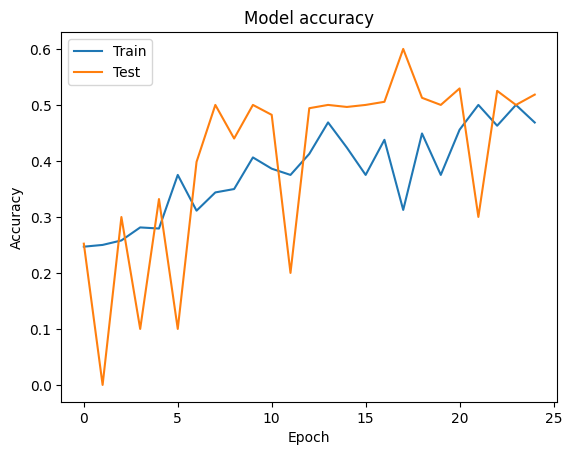

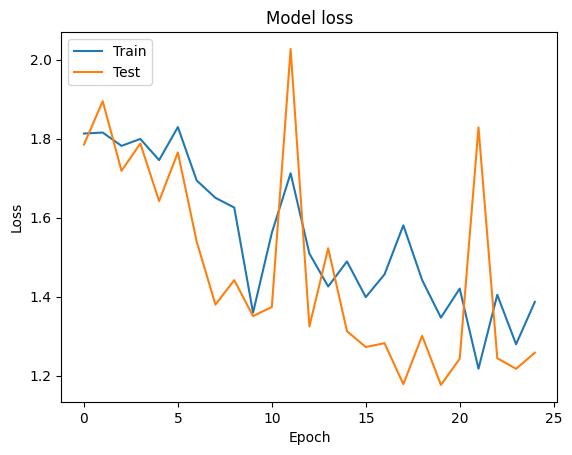

In [5]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()